In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud


In [80]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [81]:
df=pd.read_csv("blogs.csv", on_bad_lines = "skip")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [82]:
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Overview:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


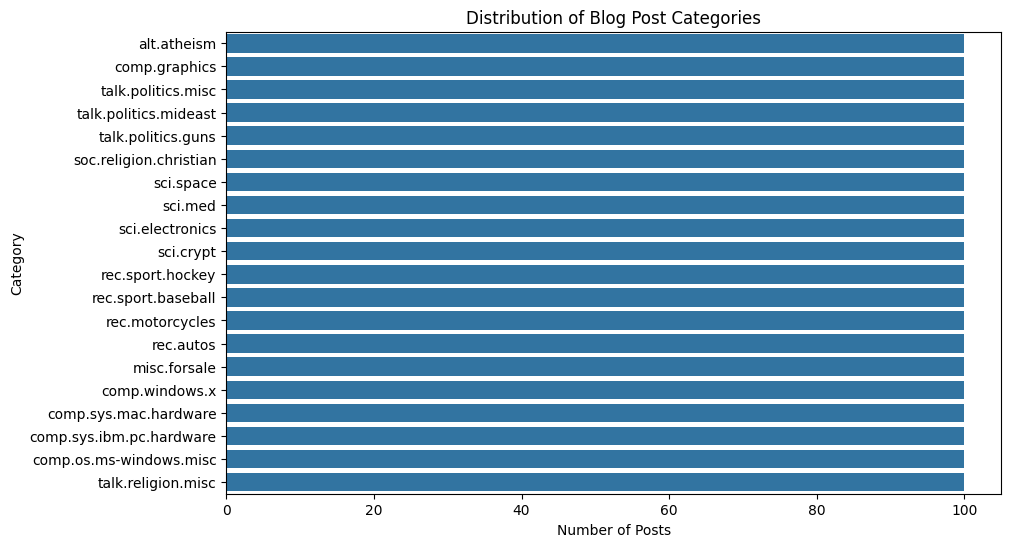

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Labels'], order=df['Labels'].value_counts().index)
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords

In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Exploration and Preprocessing

In [86]:
def clean_text(text):
    text = re.sub(r"Newsgroups:.*\n", " ", text)
    text = re.sub(r"Path:.*\n", " ", text)
    text = re.sub(r"Xref:.*\n", " ", text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

In [87]:
df['cleaned_data'] = df['Data'].apply(clean_text)

In [88]:
stop_words = set(stopwords.words('english'))
df['cleaned_data'] = df['cleaned_data'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [89]:
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X = tfidf.fit_transform(df['cleaned_data'])
y = df['Labels']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [92]:
y_pred = nb_classifier.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

In [94]:
df1=pd.DataFrame({'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1 Score':[f1]})
df1

,Accuracy,Precision,Recall,F1 Score
0,0.713333,0.74817,0.713333,0.70116


In [95]:
classification_rep

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.49      0.88      0.63        24\n           comp.graphics       0.65      0.71      0.68        28\n comp.os.ms-windows.misc       0.80      0.85      0.82        33\ncomp.sys.ibm.pc.hardware       0.72      0.50      0.59        36\n   comp.sys.mac.hardware       0.95      0.56      0.70        36\n          comp.windows.x       0.76      0.36      0.49        36\n            misc.forsale       0.54      0.83      0.66        24\n               rec.autos       0.79      0.84      0.81        31\n         rec.motorcycles       0.57      0.91      0.70        22\n      rec.sport.baseball       0.88      0.72      0.79        32\n        rec.sport.hockey       0.58      1.00      0.74        25\n               sci.crypt       0.62      0.96      0.75        24\n         sci.electronics       0.60      0.56      0.58        27\n                 sci.med       0.91      0.67      0.77    

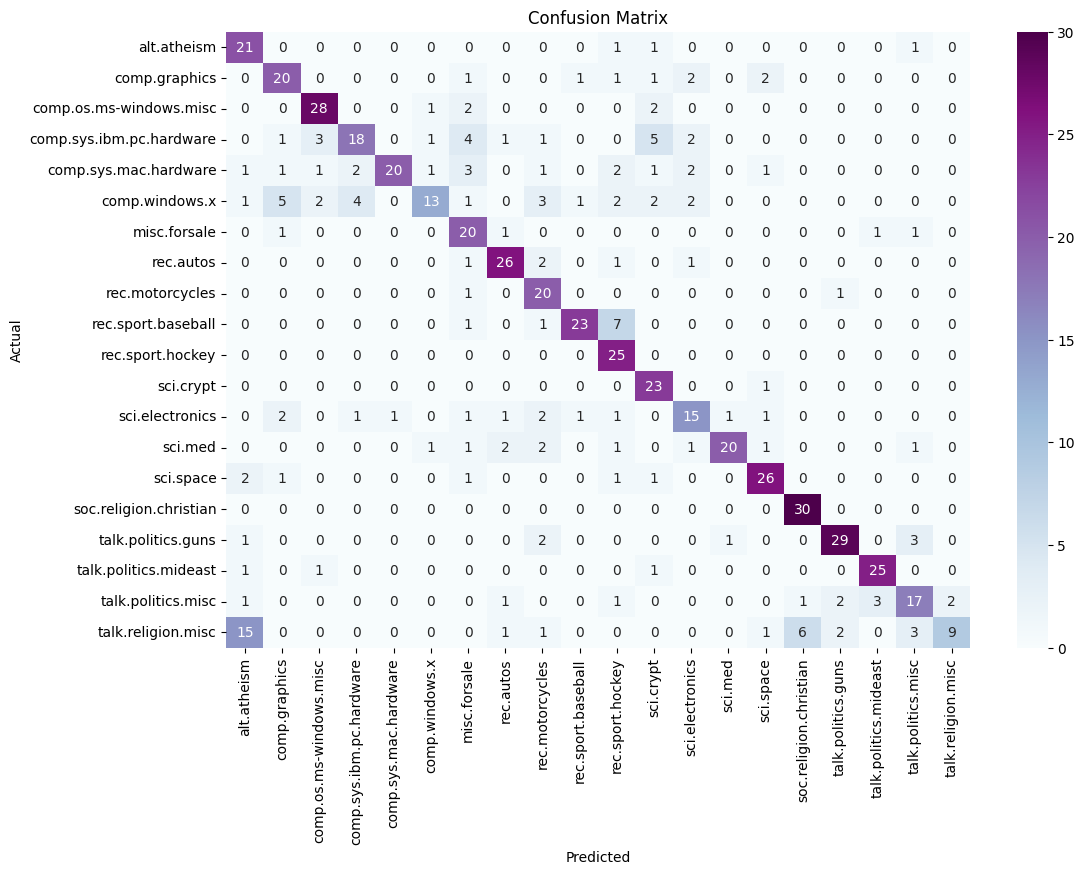

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
custom_stopwords = {
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren\'t', 'as', 'at',
    'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can\'t', 'cannot', 'could',
    'couldn\'t', 'did', 'didn\'t', 'do', 'does', 'doesn\'t', 'doing', 'don\'t', 'down', 'during', 'each', 'few',
    'for', 'from', 'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having', 'he', 'he\'d', 'he\'ll',
    'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'how\'s', 'i', 'i\'d', 'i\'ll',
    'i\'m', 'i\'ve', 'if', 'in', 'into', 'is', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'let\'s', 'me', 'more', 'most',
    'mustn\'t', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our',
    'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan\'t', 'she', 'she\'d', 'she\'ll', 'she\'s', 'should',
    'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 'their', 'theirs', 'them', 'themselves',
    'then', 'there', 'there\'s', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'this', 'those',
    'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d', 'we\'ll', 'we\'re',
    'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s', 'where', 'where\'s', 'which', 'while', 'who',
    'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 'wouldn\'t', 'you', 'you\'d', 'you\'ll', 'you\'re',
    'you\'ve', 'your', 'yours', 'yourself', 'yourselves'
}

In [98]:
df['cleaned_data'] = df['cleaned_data'].apply(lambda x: ' '.join(word for word in x.split() if word not in custom_stopwords))

In [99]:
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X = tfidf.fit_transform(df['cleaned_data'])
y = df['Labels']

# Naive Bayes Model for Text Classification

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [101]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [102]:
y_pred = nb_classifier.predict(X_test)


In [103]:
accuracy_1 = accuracy_score(y_test, y_pred)
precision_1= precision_score(y_test, y_pred, average='weighted')
recall_1 = recall_score(y_test, y_pred, average='weighted')
f1_1 = f1_score(y_test, y_pred, average='weighted')
classification_rep_1 = classification_report(y_test, y_pred)

In [104]:
df2=pd.DataFrame({'Accuracy':[accuracy_1],'Precision':[precision_1],'Recall':[recall_1],'F1 Score':[f1_1]})
df2

,Accuracy,Precision,Recall,F1 Score
0,0.715,0.749421,0.715,0.703228


In [105]:
classification_rep

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.49      0.88      0.63        24\n           comp.graphics       0.65      0.71      0.68        28\n comp.os.ms-windows.misc       0.80      0.85      0.82        33\ncomp.sys.ibm.pc.hardware       0.72      0.50      0.59        36\n   comp.sys.mac.hardware       0.95      0.56      0.70        36\n          comp.windows.x       0.76      0.36      0.49        36\n            misc.forsale       0.54      0.83      0.66        24\n               rec.autos       0.79      0.84      0.81        31\n         rec.motorcycles       0.57      0.91      0.70        22\n      rec.sport.baseball       0.88      0.72      0.79        32\n        rec.sport.hockey       0.58      1.00      0.74        25\n               sci.crypt       0.62      0.96      0.75        24\n         sci.electronics       0.60      0.56      0.58        27\n                 sci.med       0.91      0.67      0.77    

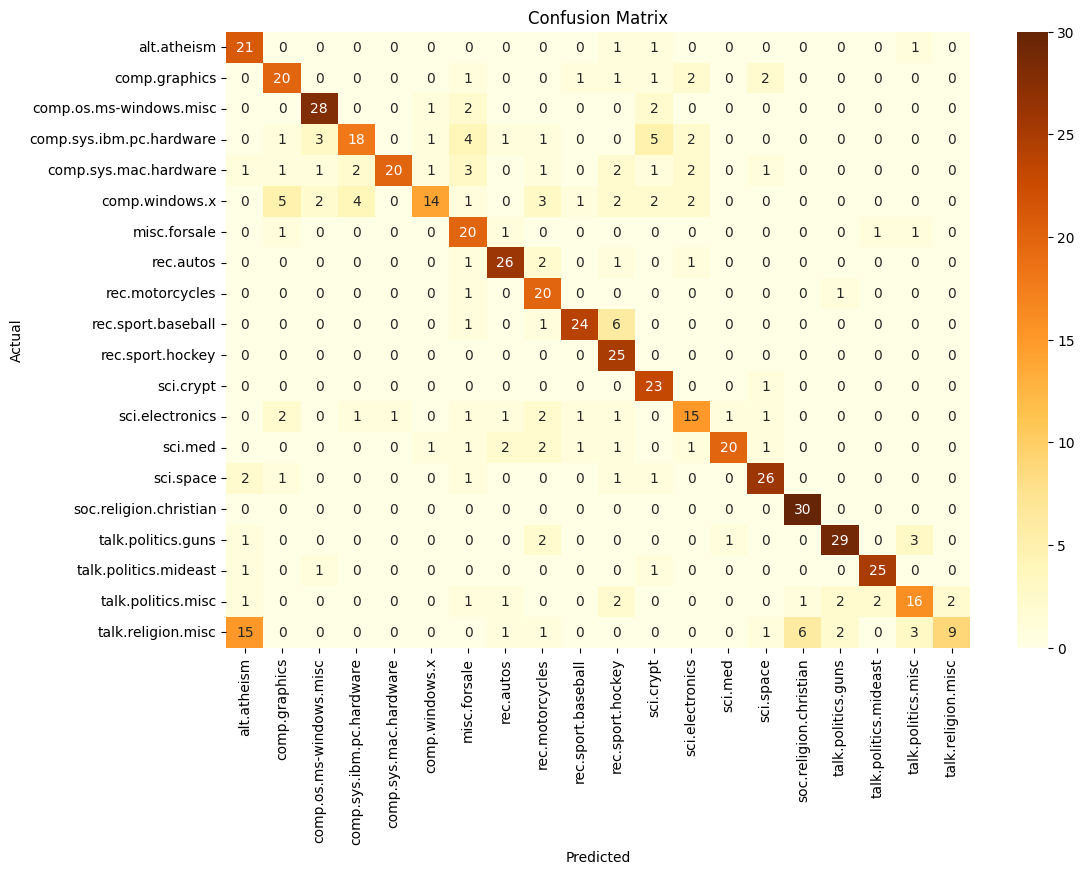

In [106]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Sentiment Analysis

In [107]:
from textblob import TextBlob


In [108]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [109]:
df['sentiment'] = df['cleaned_data'].apply(get_sentiment)


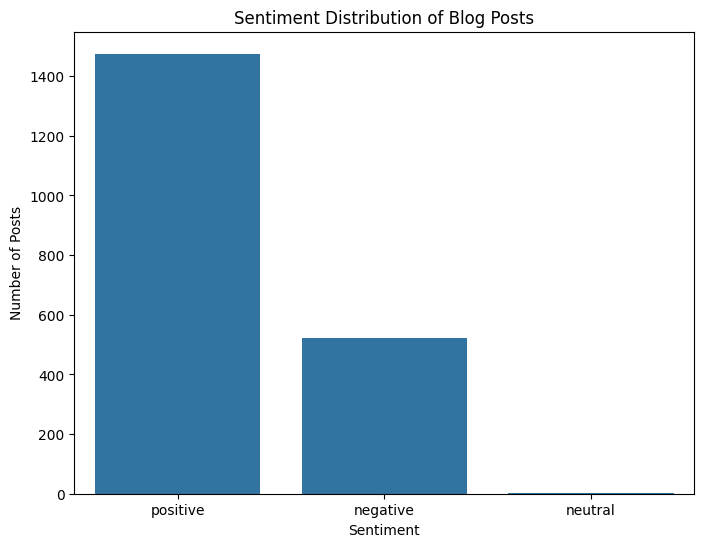

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [111]:
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:\n", sentiment_distribution)


Sentiment Distribution Across Categories:
 sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                     32        0        68
comp.graphics                   26        0        74
comp.os.ms-windows.misc         20        1        79
comp.sys.ibm.pc.hardware        18        0        82
comp.sys.mac.hardware           26        0        74
comp.windows.x                  19        2        79
misc.forsale                    20        0        80
rec.autos                       20        0        80
rec.motorcycles                 28        0        72
rec.sport.baseball              35        0        65
rec.sport.hockey                39        0        61
sci.crypt                       20        0        80
sci.electronics                 23        0        77
sci.med                         34        0        66
sci.space                       27        0        73
soc.religion.christian          22    

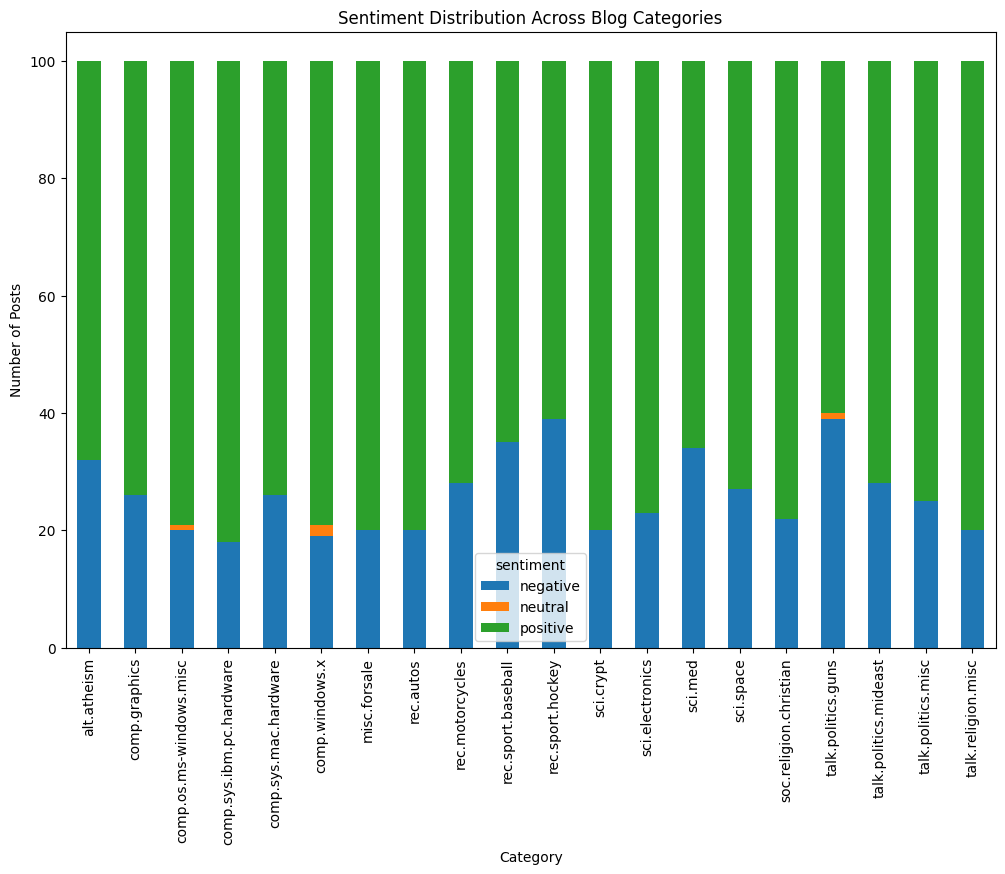

In [112]:
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.show()

# Evaluation

In [113]:
df_final = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Model 1': [accuracy, precision, recall, f1],
    'Model 2': [accuracy_1, precision_1, recall_1, f1_1]
})
df_final

,Metric,Model 1,Model 2
0,Accuracy,0.713333,0.715000
1,Precision,0.748170,0.749421
2,Recall,0.713333,0.715000
3,F1 Score,0.701160,0.703228


In [114]:
classification_rep

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.49      0.88      0.63        24\n           comp.graphics       0.65      0.71      0.68        28\n comp.os.ms-windows.misc       0.80      0.85      0.82        33\ncomp.sys.ibm.pc.hardware       0.72      0.50      0.59        36\n   comp.sys.mac.hardware       0.95      0.56      0.70        36\n          comp.windows.x       0.76      0.36      0.49        36\n            misc.forsale       0.54      0.83      0.66        24\n               rec.autos       0.79      0.84      0.81        31\n         rec.motorcycles       0.57      0.91      0.70        22\n      rec.sport.baseball       0.88      0.72      0.79        32\n        rec.sport.hockey       0.58      1.00      0.74        25\n               sci.crypt       0.62      0.96      0.75        24\n         sci.electronics       0.60      0.56      0.58        27\n                 sci.med       0.91      0.67      0.77    

In [115]:
classification_rep_1

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.88      0.64        24\n           comp.graphics       0.65      0.71      0.68        28\n comp.os.ms-windows.misc       0.80      0.85      0.82        33\ncomp.sys.ibm.pc.hardware       0.72      0.50      0.59        36\n   comp.sys.mac.hardware       0.95      0.56      0.70        36\n          comp.windows.x       0.78      0.39      0.52        36\n            misc.forsale       0.53      0.83      0.65        24\n               rec.autos       0.79      0.84      0.81        31\n         rec.motorcycles       0.57      0.91      0.70        22\n      rec.sport.baseball       0.86      0.75      0.80        32\n        rec.sport.hockey       0.58      1.00      0.74        25\n               sci.crypt       0.62      0.96      0.75        24\n         sci.electronics       0.60      0.56      0.58        27\n                 sci.med       0.91      0.67      0.77    

In [116]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

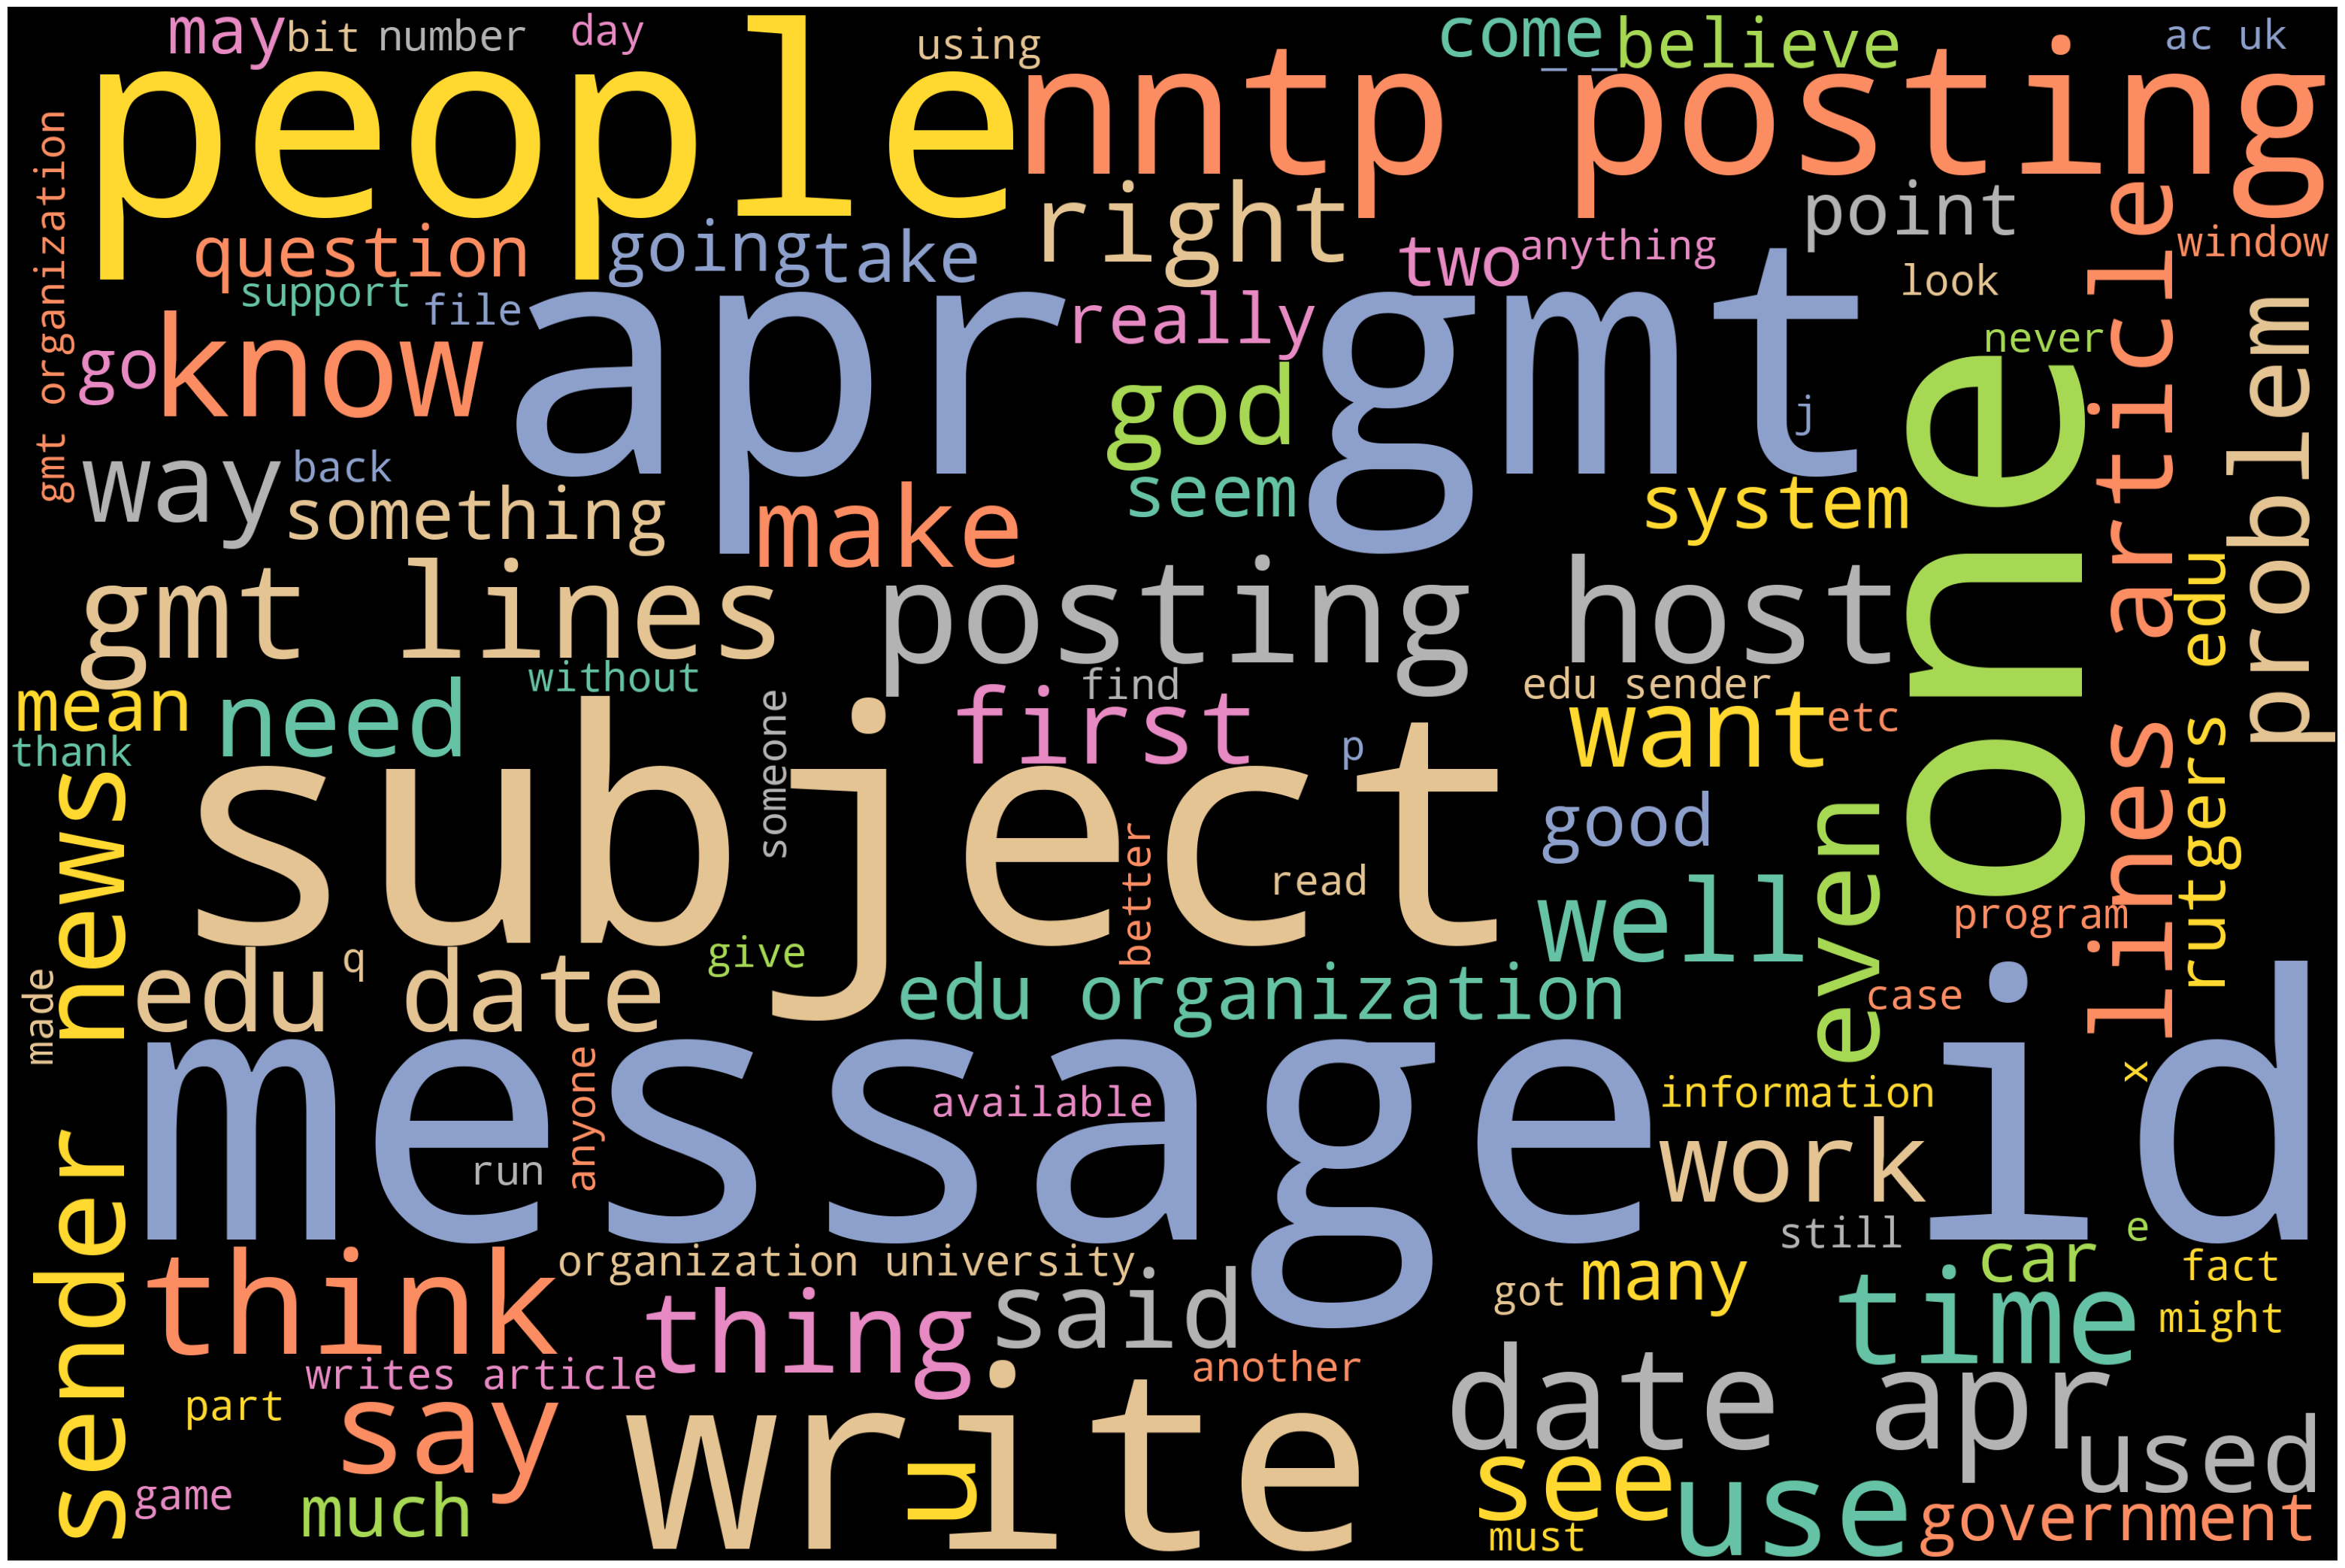

In [117]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(df['cleaned_data'].str.cat(sep= ' '))
# Plot
plot_cloud(wordcloud)